In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd

import matplotlib as plt

In [4]:
movies = pd.read_csv("Movies.csv")

In [6]:
print(movies)

        id                       title  \
0        1    The Shawshank Redemption   
1        2               The Godfather   
2        3       The Godfather Part II   
3        4            Schindler's List   
4        5                12 Angry Men   
...    ...                         ...   
9713  9714           Alone in the Dark   
9714  9715              Disaster Movie   
9715  9716           House of the Dead   
9716  9717        Dragonball Evolution   
9717  9718  Birdemic: Shock and Terror   

                                                 genres language  user_score  \
0                                          Drama, Crime       en         8.7   
1                                          Drama, Crime       en         8.7   
2                                          Drama, Crime       en         8.6   
3                                   Drama, History, War       en         8.6   
4                                                 Drama       en         8.5   
...            

In [5]:
movies.head()

,id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
0,1,The Shawshank Redemption,"Drama, Crime",en,8.7,2,22,1994-09-23,27070
1,2,The Godfather,"Drama, Crime",en,8.7,2,55,1972-03-14,20563
2,3,The Godfather Part II,"Drama, Crime",en,8.6,3,22,1974-12-20,12403
3,4,Schindler's List,"Drama, History, War",en,8.6,3,15,1993-12-15,15810
4,5,12 Angry Men,Drama,en,8.5,1,37,1957-04-10,8611


In [7]:
movies.tail()

,id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
9713,9714,Alone in the Dark,"Action, Fantasy, Horror",en,3.3,1,38,2005-01-28,602
9714,9715,Disaster Movie,Comedy,en,3.2,1,27,2008-08-29,1021
9715,9716,House of the Dead,"Horror, Action, Thriller",en,3.1,1,30,2003-04-11,384
9716,9717,Dragonball Evolution,"Action, Adventure, Fantasy, Science Fiction, T...",en,2.9,1,25,2009-03-12,2028
9717,9718,Birdemic: Shock and Terror,"Romance, Horror, Thriller",en,2.2,1,33,2010-02-27,334


In [9]:
movies.shape

(9718, 9)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9718 non-null   int64  
 1   title         9718 non-null   object 
 2   genres        9718 non-null   object 
 3   language      9718 non-null   object 
 4   user_score    9718 non-null   float64
 5   runtime_hour  9718 non-null   int64  
 6   runtime_min   9718 non-null   int64  
 7   release_date  9718 non-null   object 
 8   vote_count    9718 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 683.4+ KB


In [13]:
print(movies.isnull().any().any())

False


In [14]:
movies.columns

Index(['id', 'title', 'genres', 'language', 'user_score', 'runtime_hour',
       'runtime_min', 'release_date', 'vote_count'],
      dtype='object')

In [15]:
movies['genres'].value_counts()

genres
Comedy                                                           584
Drama                                                            565
Drama, Romance                                                   264
Comedy, Romance                                                  243
Comedy, Drama                                                    222
                                                                ... 
Action, Adventure, Comedy, Fantasy, Science Fiction, Thriller      1
Thriller, Horror, Drama, Mystery                                   1
Action, Thriller, Romance, Adventure                               1
Action, Fantasy, Crime                                             1
Science Fiction, Action, Comedy, Horror, TV Movie                  1
Name: count, Length: 2050, dtype: int64

Provide descriptive stats:

In [17]:
pd.set_option('display.float_format', '{:.2f}'.format)

movies.describe()

,id,user_score,runtime_hour,runtime_min,vote_count
count,9718.00,9718.00,9718.00,9718.00,9718.00
mean,4859.50,6.63,1.20,33.75,1982.47
std,2805.49,0.78,0.46,15.68,3135.11
min,1.00,2.20,0.00,0.00,300.00
25%,2430.25,6.10,1.00,25.00,468.00
50%,4859.50,6.70,1.00,36.00,841.50
75%,7288.75,7.20,1.00,46.00,1971.00
max,9718.00,8.70,6.00,59.00,36495.00


<Axes: xlabel='genres'>

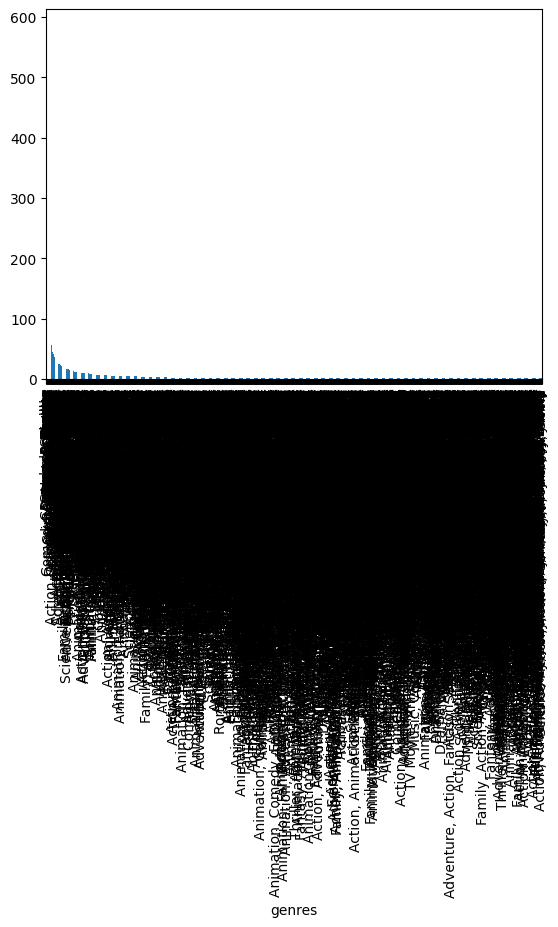

In [18]:
movies['genres'].value_counts().plot(kind='bar', rot=90)